# MLCC - Laboratory 3 - Dimensionality reduction and feature selection
In this laboratory we will address the problem of data analysis with a reference to a classification problem. 
Follow the instructions below.

In [1]:
# Import the 
from lab3ImpFunction import *


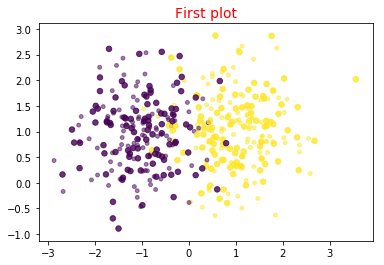

In [2]:
# main1
N = 100;
D = 30;

Xtr, Ytr = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7], [0.7]]),N);
Ytr[Ytr==2]= -1;

Xts, Yts = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7],[0.7]]),N);
Yts[Yts==2] = -1;

plt.scatter(Xtr[:,0], Xtr[:,1], s=15, c=Ytr, alpha=0.5)
plt.scatter(Xts[:,0], Xts[:,1], s=30, c=Yts, alpha=0.8)
plt.title('First plot', fontsize=14, color='red')
plt.show()
# plt.title('First plot')

/home/suraj/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


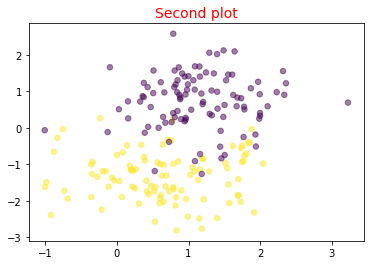

In [3]:
sigma_noise = 0.01;

Xtr_noise = sigma_noise * np.random.randn(2*N, D-2);
Xts_noise = sigma_noise * np.random.randn(2*N, D-2);

Xtr = np.concatenate((Xtr, Xtr_noise), axis=1)
Xts = np.concatenate((Xts, Xts_noise), axis=1)

V, d, X_proj = PCA(Xtr, 2)

plt.scatter(X_proj[:,0], X_proj[:,1], s=30, c=Ytr, alpha=0.5)
plt.title('Second plot', fontsize=14, color='red')
plt.show()

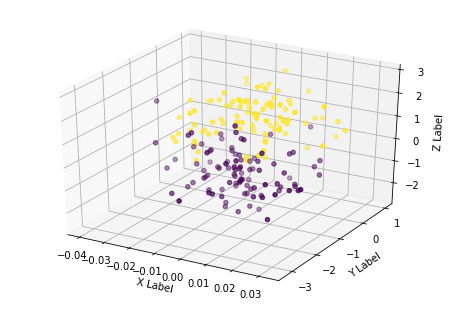

In [4]:
V, d, X_proj = PCA(Xtr, 3)

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

x = X_proj[:,0].real
y = X_proj[:,1].real
z = X_proj[:,2].real

ax.scatter(x, y, z, c=Ytr, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

pyplot.show()

[ 1.27856406+0.j  1.16118793+0.j  0.01303902+0.j]


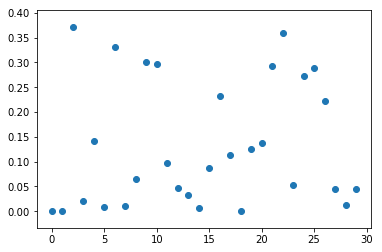

In [5]:
V, d, X_proj = PCA(Xtr, 3);
print(np.sqrt(d[:10]));

plt.scatter(list(range(D)), abs(V[:,0]))
plt.show()

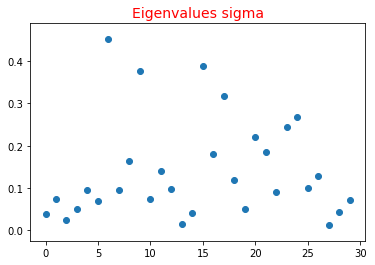

/home/suraj/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


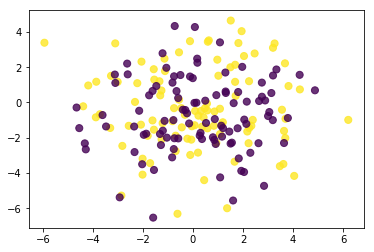

In [6]:
## Test on different sigma
Xtr, Ytr = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7], [0.7]]),N);
Xtr = np.concatenate(Xtr, axis=0)
Ytr = np.concatenate(Ytr, axis=0)
Ytr[Ytr==2]= -1;

Xts, Yts = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7],[0.7]]),N);
Xts = np.concatenate(Xts, axis=0)
Yts = np.concatenate(Yts, axis=0)
Yts[Yts==2] = -1;

sigma_noise = [0, 0.01, 0.1, 0.5, 0.7, 1, 1.2, 1.4, 1.6, 2]

Xtr_noise = sigma_noise[9] * np.random.randn(2*N, D-2);

Xtr2 = np.concatenate((Xtr, Xtr_noise), axis=1)

V, d, X_proj = PCA(Xtr2, 10)

plt.scatter(list(range(D)), abs(V[:,0]));
plt.title('Eigenvalues sigma',fontsize=14, color='red')
plt.show()

plt.scatter(X_proj[:,1], X_proj[:,2], 50, Ytr, alpha=0.8);
plt.show()


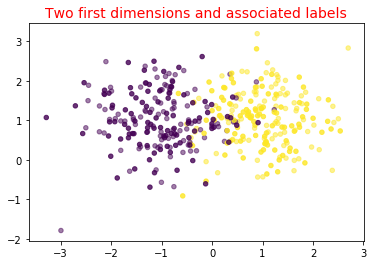

In [2]:
## main2

N = 100
D = 30

Xtr, Ytr = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7], [0.7]]),N);
Xtr = np.concatenate(Xtr, axis=0)
Ytr = np.concatenate(Ytr, axis=0)
Ytr[Ytr==2]= -1;

Xts, Yts = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7],[0.7]]),N);
Xts = np.concatenate(Xts, axis=0)
Yts = np.concatenate(Yts, axis=0)
Yts[Yts==2] = -1;

plt.scatter(Xtr[:,0], Xtr[:,1], s=20, c=Ytr, alpha=0.5);
plt.scatter(Xts[:,0], Xts[:,1], s=20, c=Yts, alpha=0.8);
plt.title('Two first dimensions and associated labels', fontsize=14, color='red');
plt.show()

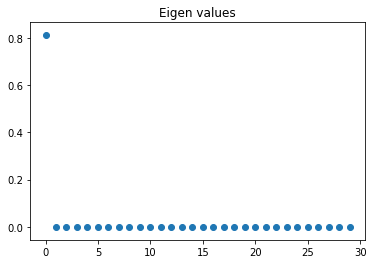

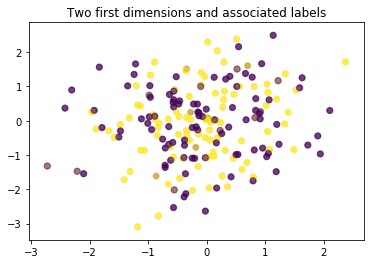

In [3]:
sigma_noise = 0.01;
Xtr_noise = sigma_noise * np.random.randn(2*N, D-2);
Xts_noise = sigma_noise * np.random.randn(2*N, D-2);

Xtr = np.concatenate((Xtr, Xtr_noise), axis=1)
Xts = np.concatenate((Xts, Xts_noise), axis=1)

# Normalize

m = np.mean(Xtr, axis=0)
s = np.std(Xtr, axis=0)

for i in range(2*N):
    Xtr[i, :] = Xtr[i, :] - m
    Xts[i, :] = Xts[i, :] - m
    
for i in range(2*N):
    Xtr[i, :] = Xtr[i, :] / s
    Xts[i, :] = Xts[i, :] / s
    
w, r, I = OMatchingPursuit(Xtr, Ytr, 2)

Ypred = np.sign(Xts.dot(w))

err = calcErr(Yts, Ypred);

plt.scatter(list(range(D)), abs(w))
plt.title('Eigen values');
plt.show()

plt.scatter(Xts[:,1], Xts[:,2], 30, Yts, alpha=0.5);
plt.scatter(Xts[:,1], Xts[:,2], 40, Ypred, alpha=0.5);
plt.title('Two first dimensions and associated labels', );
plt.show()    

rip         Iter        valErr      trErr       
0           1           1.000000    1.000000    
rip         Iter        valErr      trErr       
0           2           0.080000    0.100000    
rip         Iter        valErr      trErr       
0           3           0.106667    0.100000    
rip         Iter        valErr      trErr       
0           4           0.106667    0.080000    
rip         Iter        valErr      trErr       
0           5           0.113333    0.060000    
rip         Iter        valErr      trErr       
0           6           0.146667    0.060000    
rip         Iter        valErr      trErr       
0           7           0.133333    0.040000    
rip         Iter        valErr      trErr       
0           8           0.173333    0.040000    
rip         Iter        valErr      trErr       
0           9           0.193333    0.040000    
rip         Iter        valErr      trErr       
0           10          0.193333    0.020000    
rip         Iter    

rip         Iter        valErr      trErr       
2           26          0.233333    0.000000    
rip         Iter        valErr      trErr       
2           27          0.233333    0.000000    
rip         Iter        valErr      trErr       
2           28          0.240000    0.000000    
rip         Iter        valErr      trErr       
2           29          0.246667    0.000000    
rip         Iter        valErr      trErr       
2           30          0.253333    0.000000    
rip         Iter        valErr      trErr       
3           1           1.000000    1.000000    
rip         Iter        valErr      trErr       
3           2           0.093333    0.060000    
rip         Iter        valErr      trErr       
3           3           0.113333    0.040000    
rip         Iter        valErr      trErr       
3           4           0.120000    0.040000    
rip         Iter        valErr      trErr       
3           5           0.153333    0.020000    
rip         Iter    

rip         Iter        valErr      trErr       
5           28          0.220000    0.040000    
rip         Iter        valErr      trErr       
5           29          0.220000    0.040000    
rip         Iter        valErr      trErr       
5           30          0.220000    0.040000    
rip         Iter        valErr      trErr       
6           1           1.000000    1.000000    
rip         Iter        valErr      trErr       
6           2           0.086667    0.080000    
rip         Iter        valErr      trErr       
6           3           0.106667    0.060000    
rip         Iter        valErr      trErr       
6           4           0.133333    0.060000    
rip         Iter        valErr      trErr       
6           5           0.140000    0.060000    
rip         Iter        valErr      trErr       
6           6           0.160000    0.060000    
rip         Iter        valErr      trErr       
6           7           0.166667    0.040000    
rip         Iter    

rip         Iter        valErr      trErr       
8           25          0.186667    0.020000    
rip         Iter        valErr      trErr       
8           26          0.186667    0.020000    
rip         Iter        valErr      trErr       
8           27          0.186667    0.040000    
rip         Iter        valErr      trErr       
8           28          0.193333    0.020000    
rip         Iter        valErr      trErr       
8           29          0.186667    0.020000    
rip         Iter        valErr      trErr       
8           30          0.186667    0.020000    
rip         Iter        valErr      trErr       
9           1           1.000000    1.000000    
rip         Iter        valErr      trErr       
9           2           0.053333    0.180000    
rip         Iter        valErr      trErr       
9           3           0.073333    0.160000    
rip         Iter        valErr      trErr       
9           4           0.106667    0.160000    
rip         Iter    

rip         Iter        valErr      trErr       
11          20          0.233333    0.000000    
rip         Iter        valErr      trErr       
11          21          0.240000    0.000000    
rip         Iter        valErr      trErr       
11          22          0.253333    0.000000    
rip         Iter        valErr      trErr       
11          23          0.246667    0.000000    
rip         Iter        valErr      trErr       
11          24          0.260000    0.000000    
rip         Iter        valErr      trErr       
11          25          0.253333    0.000000    
rip         Iter        valErr      trErr       
11          26          0.253333    0.000000    
rip         Iter        valErr      trErr       
11          27          0.240000    0.000000    
rip         Iter        valErr      trErr       
11          28          0.240000    0.000000    
rip         Iter        valErr      trErr       
11          29          0.246667    0.000000    
rip         Iter    

rip         Iter        valErr      trErr       
14          16          0.213333    0.020000    
rip         Iter        valErr      trErr       
14          17          0.200000    0.020000    
rip         Iter        valErr      trErr       
14          18          0.200000    0.020000    
rip         Iter        valErr      trErr       
14          19          0.206667    0.020000    
rip         Iter        valErr      trErr       
14          20          0.206667    0.020000    
rip         Iter        valErr      trErr       
14          21          0.206667    0.020000    
rip         Iter        valErr      trErr       
14          22          0.213333    0.020000    
rip         Iter        valErr      trErr       
14          23          0.220000    0.020000    
rip         Iter        valErr      trErr       
14          24          0.233333    0.020000    
rip         Iter        valErr      trErr       
14          25          0.233333    0.020000    
rip         Iter    

rip         Iter        valErr      trErr       
17          16          0.200000    0.020000    
rip         Iter        valErr      trErr       
17          17          0.166667    0.020000    
rip         Iter        valErr      trErr       
17          18          0.186667    0.020000    
rip         Iter        valErr      trErr       
17          19          0.220000    0.020000    
rip         Iter        valErr      trErr       
17          20          0.220000    0.020000    
rip         Iter        valErr      trErr       
17          21          0.240000    0.020000    
rip         Iter        valErr      trErr       
17          22          0.240000    0.020000    
rip         Iter        valErr      trErr       
17          23          0.240000    0.020000    
rip         Iter        valErr      trErr       
17          24          0.260000    0.020000    
rip         Iter        valErr      trErr       
17          25          0.266667    0.020000    
rip         Iter    

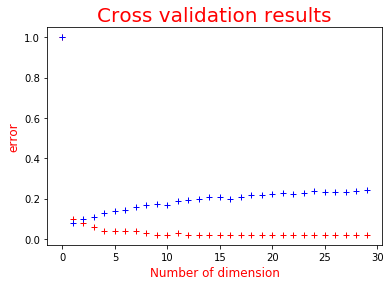

In [4]:
intIter = list(range(D))
perc = 0.75
nrip = 20
it, Vm, Vs, Tm, Ts = holdoutCVOMP(Xtr, Ytr, perc, nrip, intIter)

# figure;
plt.plot(intIter, Tm, 'r+');
# hold on;
plt.plot(intIter, Vm, 'b+');
# hold on;
plt.title('Cross validation results', fontsize=20, color='red'); 
# plt.legend('Training error','Validation error'); 
plt.xlabel('Number of dimension', fontsize=12, color='red'); 
plt.ylabel('error', fontsize=12, color='red');
plt.show()